# 선형회귀 구현

## 0. Load Module & Setting

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

torch.manual_seed(42) # 시드 고정

Using device: cuda


# 1. Data Preparation

In [3]:
# 1차원 데이터 100개 준비
X = torch.linspace(-10, 10, 100).unsqueeze(1)  # (100, 1)
y = 3 * X + 2 + torch.randn_like(X) * 2       # 노이즈 추가

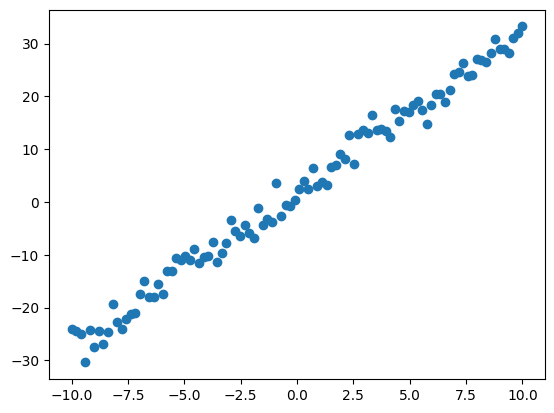

In [4]:
plt.scatter(X, y)
plt.show()

In [5]:
X = X.to(device)    # GPU로 데이터 이동
y = y.to(device)    # GPU로 데이터 이동

## 2. Data Preprocessing (Skip)

## 3. Model Define

In [6]:
model = nn.Linear(1, 1).to(device)  # 선형 모델 y = w*x + b
loss_func = nn.MSELoss()    # 손실함수 L = (y - y_pred) ** 2
optimizer = optim.SGD(model.parameters(), lr=0.01)  # 기울기 optimizer -> stochastic GD

## 4. Train

In [7]:
epochs = 200    # 학습 반복할 횟수 (에포크)

loss_history = []

for epoch in range(epochs):
    y_pred = model(X)   # 모델을 거친 예측값 저장
    loss = loss_func(y_pred, y) # loss 계산

    
    optimizer.zero_grad()   # 기울기 초기화
    loss.backward()         # 역전파
    optimizer.step()        # 가중치 업데이트

    loss_history.append(loss.item())

    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [20/200], Loss: 8.0268
Epoch [40/200], Loss: 5.7125
Epoch [60/200], Loss: 4.6810
Epoch [80/200], Loss: 4.2213
Epoch [100/200], Loss: 4.0164
Epoch [120/200], Loss: 3.9250
Epoch [140/200], Loss: 3.8843
Epoch [160/200], Loss: 3.8662
Epoch [180/200], Loss: 3.8581
Epoch [200/200], Loss: 3.8545


In [8]:
w = model.weight.item()
b = model.bias.item()

print("\nLearned parameters:")
print("w =", w)
print("b =", b)


Learned parameters:
w = 2.9941048622131348
b = 2.066777467727661


## 5. Inference

In [9]:
model.eval()   # 모델의 평가 모드 (모델 구조 업데이트 X)

with torch.no_grad():   # gradient 계산 비활성화
    # 새 데이터 (test data)
    # 입력 값이랑 shape이 동일해야 함 (1차원 데이터)
    x_test = torch.tensor([[4.0]]).to(device)
    # 추론
    y_inference = model(x_test)

    print(f"\nInput: {x_test.item()}")
    print(f"Predicted Output: {y_inference.item():.4f}")


Input: 4.0
Predicted Output: 14.0432
